In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
sales=pd.read_csv("C:/Users/98sun/Downloads/sales_data-set.csv")
features=pd.read_csv("C:/Users/98sun/Downloads/Features_data_set.csv")
stores=pd.read_csv("C:/Users/98sun/Downloads/stores_data-set.csv")

In [84]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [85]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [86]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [87]:
merged=sales.merge(features, how='inner', on=['Store','Date'])
merged=merged.merge(stores, on='Store')
merged_na=merged.dropna()
merged=merged.fillna(0)

In [88]:
merged[['type1', 'type2', 'type3']]=pd.get_dummies(merged['Type'])

In [89]:
merged=merged.drop('Type', axis=1)

In [53]:

'''
X=merged.drop(['Weekly_Sales', 'Date'], axis=1)
y=merged['Weekly_Sales']

y=np.reshape(y, (-1,))

train_length=int(X.shape[0]*0.8)
X_train=X[:train_length]
X_test=X[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

In [54]:
'''
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

rf_clf=RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_train=rf_clf.predict(X_train)
pred_test = rf_clf.predict(X_test)

In [63]:
np.average((y_test-pred_test)/y_test)

-67.19291708544418

In [68]:
np.mean(np.abs((y_test-pred_test)/y_test))*100

7006.755838500777

<AxesSubplot:>

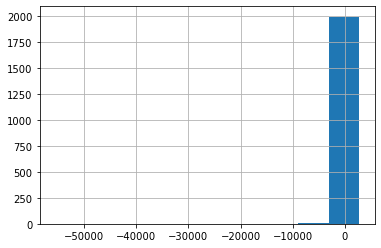

In [64]:
((y_test-pred_test)/y_test).hist()

In [8]:
merged['year_m']=pd.to_datetime(merged['Date']).dt.strftime("%Y/%m")

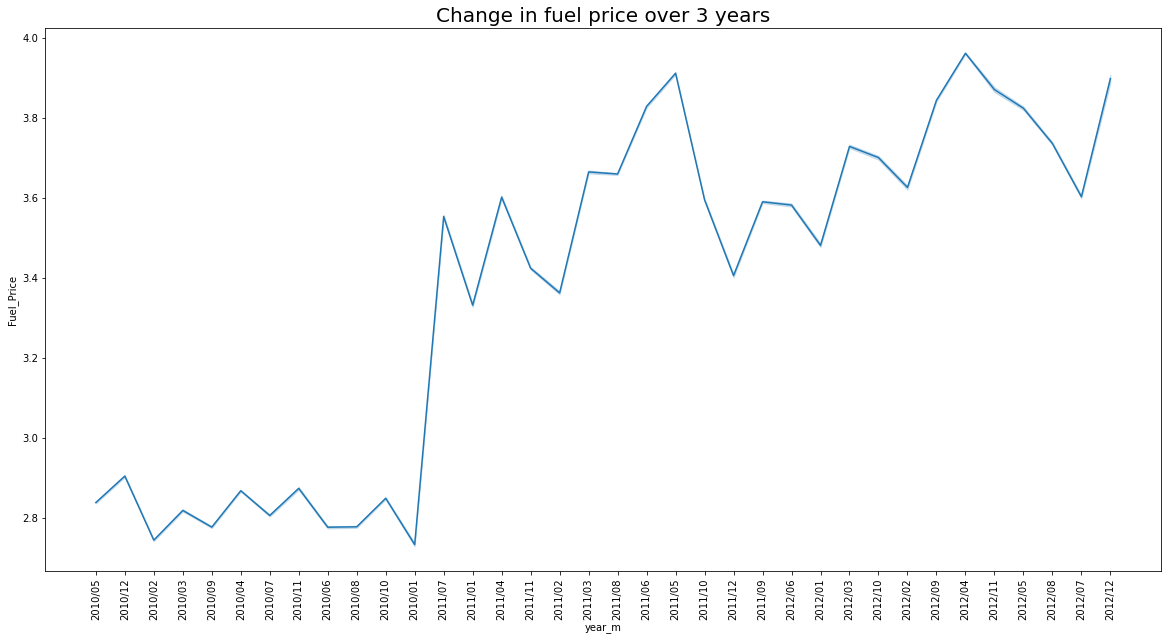

In [9]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = merged, x = 'year_m',y = 'Fuel_Price')
plt.title('Change in fuel price over 3 years', fontsize=20)
plt.show()

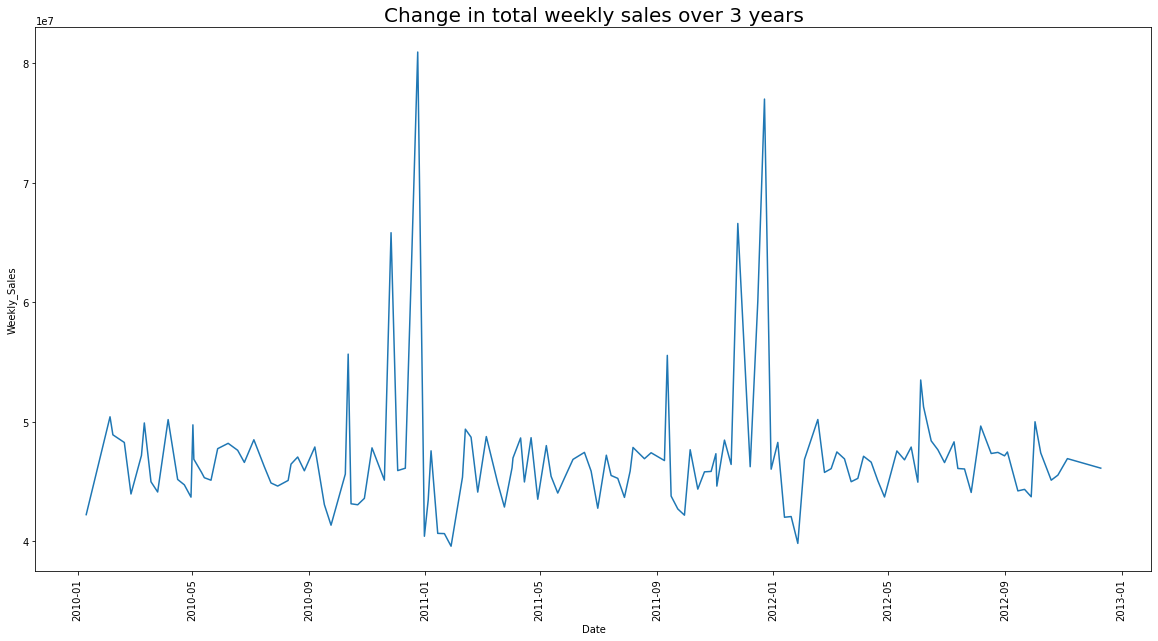

In [132]:
#df_average_sales_week = df.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
#df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)
merged['Date'] = pd.to_datetime(merged['Date'])
df_sales_sum=merged.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_sales_sum=df_sales_sum.sort_values("Date", ascending=True)


plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = df_sales_sum, x = 'Date',y = 'Weekly_Sales')
plt.title('Change in total weekly sales over 3 years', fontsize=20)
plt.show()

In [133]:
temp1=merged.groupby(by='Date')[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI','Unemployment', 'Size', 'type1', 'type2', 'type3']].mean().reset_index()

In [134]:
temp2=merged[['Date','IsHoliday_x']].drop_duplicates()

In [135]:
temp1

,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,type1,type2,type3
0,2010-01-10,69.386998,2.733064,0.000000,0.000000,0.000000,0.000000,0.000000,168.004935,8.433960,136669.288586,0.511755,0.387734,0.100511
1,2010-02-04,52.587887,2.825453,0.000000,0.000000,0.000000,0.000000,0.000000,167.377836,8.441092,137317.537131,0.510682,0.388945,0.100373
2,2010-02-07,76.555955,2.793190,0.000000,0.000000,0.000000,0.000000,0.000000,167.663264,8.373801,137393.821735,0.513541,0.388756,0.097703
3,2010-02-19,37.038310,2.673666,0.000000,0.000000,0.000000,0.000000,0.000000,167.338966,8.576351,137278.637219,0.510245,0.391669,0.098085
4,2010-02-26,38.629563,2.685642,0.000000,0.000000,0.000000,0.000000,0.000000,167.691019,8.561375,137346.344629,0.510335,0.391393,0.098272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2012-10-08,81.164112,3.633858,10906.318637,99.645465,33.646145,4013.650227,3622.305353,175.378772,7.224676,136384.927291,0.511329,0.383497,0.105174
139,2012-10-19,60.152756,3.878413,1916.437102,0.000000,13.193959,432.050420,3306.170729,176.295499,6.948928,135892.584068,0.505085,0.389831,0.105085
140,2012-10-26,60.530277,3.791086,4937.534508,68.773298,65.750953,632.641690,1891.406624,176.182886,6.943212,136113.406218,0.507266,0.387969,0.104765
141,2012-11-05,64.330478,3.870212,10012.666199,9.038009,59.138342,2096.174877,2984.689223,175.033194,7.407993,136483.913555,0.511268,0.386478,0.102254


In [136]:
temp3=temp1.merge(temp2)

In [137]:
final=df_sales_sum.merge(temp3)

In [138]:
final['Date_ord']=final['Date'].apply(lambda x:x.toordinal())

In [139]:


X=final.drop(['Weekly_Sales', 'Date'], axis=1)
y=final['Weekly_Sales']

y=np.reshape(y, (-1,))

train_length=int(X.shape[0]*0.8)
X_train=X[:train_length]
X_test=X[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]


In [140]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier

rf_clf=RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_train=rf_clf.predict(X_train)
pred_test = rf_clf.predict(X_test)

In [141]:
np.mean(np.abs((y_test-pred_test)/y_test))*100

3.4598546468219817

In [161]:
finaldate=final[int(len(final)*0.8):].Date

In [171]:
df=pd.DataFrame({'date':finaldate, 'sale':pred_test})

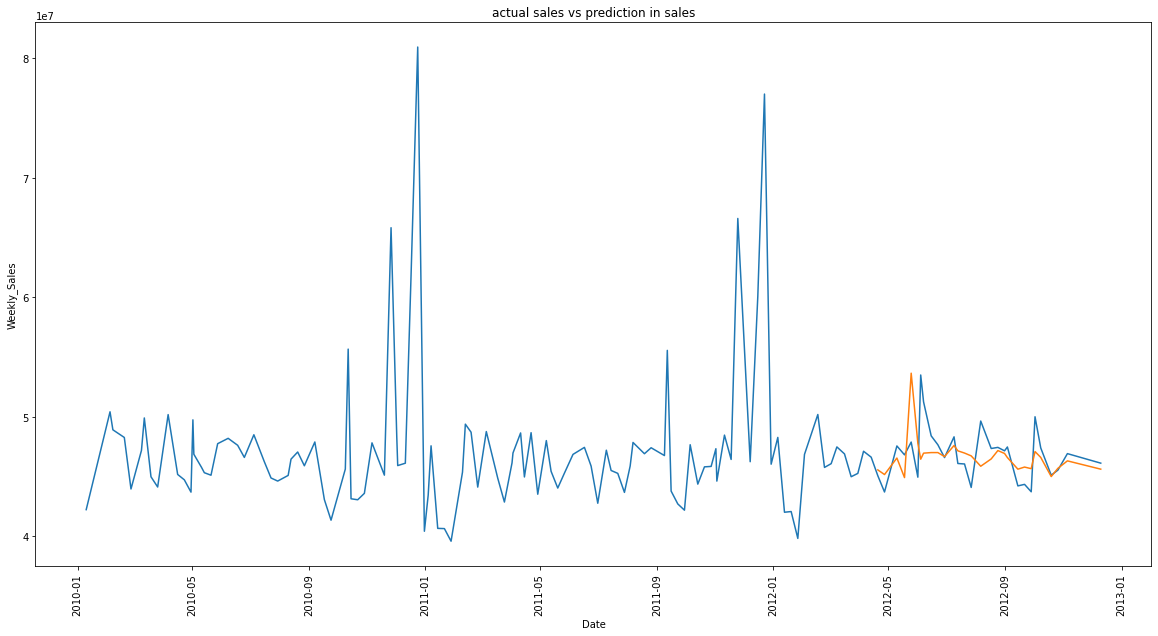

In [174]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data=final, x='Date', y='Weekly_Sales')
sns.lineplot(data=df, x='date', y='sale')
plt.title("actual sales vs prediction in sales")
plt.show()


In [167]:
finaldate.to_list()

[Timestamp('2012-04-20 00:00:00'),
 Timestamp('2012-04-27 00:00:00'),
 Timestamp('2012-05-10 00:00:00'),
 Timestamp('2012-05-18 00:00:00'),
 Timestamp('2012-05-25 00:00:00'),
 Timestamp('2012-06-01 00:00:00'),
 Timestamp('2012-06-04 00:00:00'),
 Timestamp('2012-06-07 00:00:00'),
 Timestamp('2012-06-15 00:00:00'),
 Timestamp('2012-06-22 00:00:00'),
 Timestamp('2012-06-29 00:00:00'),
 Timestamp('2012-07-09 00:00:00'),
 Timestamp('2012-07-13 00:00:00'),
 Timestamp('2012-07-20 00:00:00'),
 Timestamp('2012-07-27 00:00:00'),
 Timestamp('2012-08-06 00:00:00'),
 Timestamp('2012-08-17 00:00:00'),
 Timestamp('2012-08-24 00:00:00'),
 Timestamp('2012-08-31 00:00:00'),
 Timestamp('2012-09-03 00:00:00'),
 Timestamp('2012-09-14 00:00:00'),
 Timestamp('2012-09-21 00:00:00'),
 Timestamp('2012-09-28 00:00:00'),
 Timestamp('2012-10-02 00:00:00'),
 Timestamp('2012-10-08 00:00:00'),
 Timestamp('2012-10-19 00:00:00'),
 Timestamp('2012-10-26 00:00:00'),
 Timestamp('2012-11-05 00:00:00'),
 Timestamp('2012-12-

In [146]:
y_test

114    45072529.78
115    43716798.89
116    47566639.31
117    46823939.22
118    47892463.31
119    44955421.95
120    53502315.87
121    51253021.88
122    48412110.70
123    47668284.97
124    46597112.12
125    48330059.31
126    46099732.10
127    46059543.45
128    44097154.97
129    49651171.78
130    47354452.05
131    47447323.60
132    47159639.43
133    47480454.11
134    44226038.65
135    44354547.11
136    43734899.40
137    50009407.92
138    47403451.04
139    45122410.57
140    45544116.29
141    46925878.99
142    46128514.25
Name: Weekly_Sales, dtype: float64

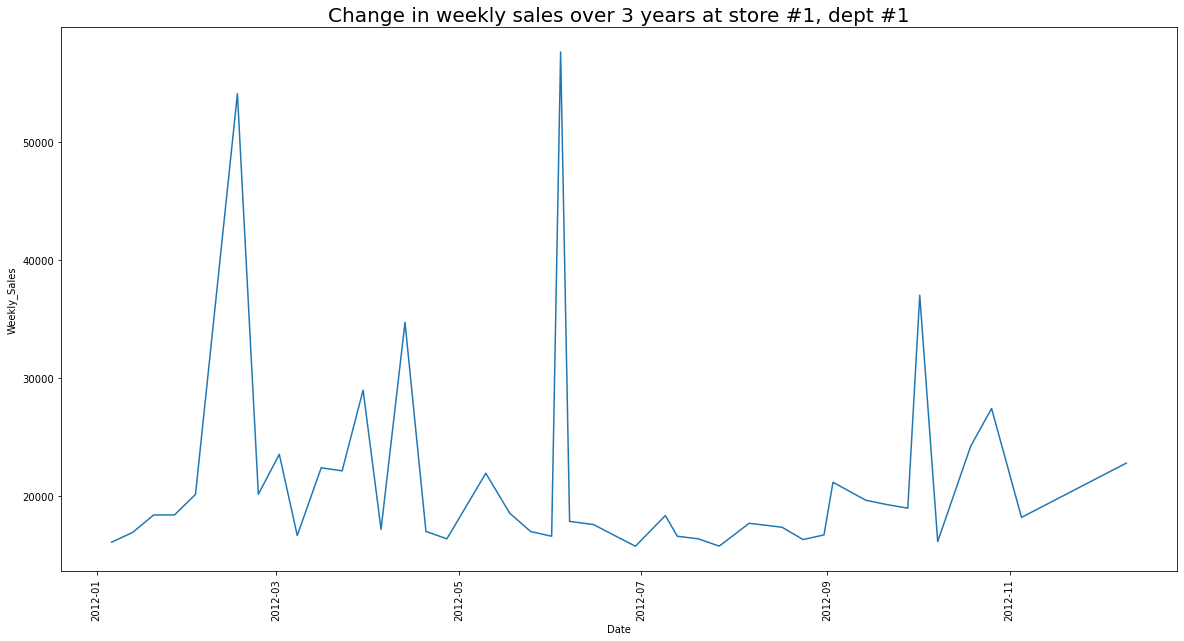

In [12]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = merged[(merged['Dept']==1)  & (merged['Store']==1) & (merged['Date'].dt.year==2012)], x = 'Date',y = 'Weekly_Sales', ci = 1)
plt.title('Change in weekly sales over 3 years at store #1, dept #1', fontsize=20)
plt.show()


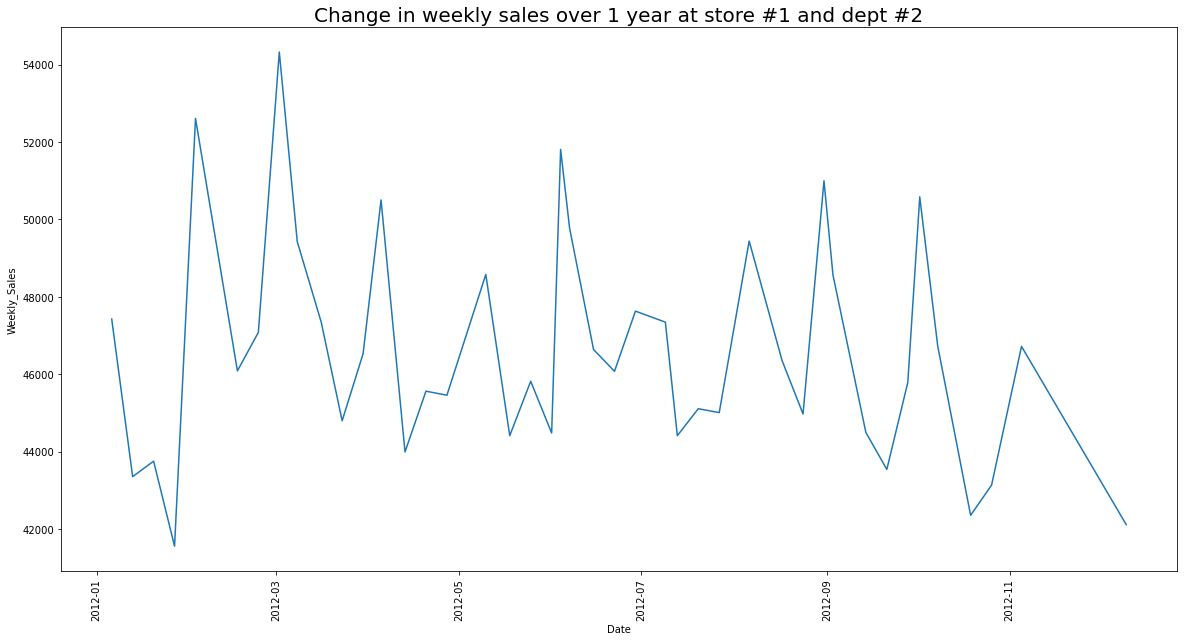

In [13]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = merged[(merged['Dept']==2)  & (merged['Store']==1) & (pd.to_datetime(merged['Date']).dt.year==2012)], x = 'Date',y = 'Weekly_Sales', ci = 1)
plt.title('Change in weekly sales over 1 year at store #1 and dept #2', fontsize=20)
plt.show()

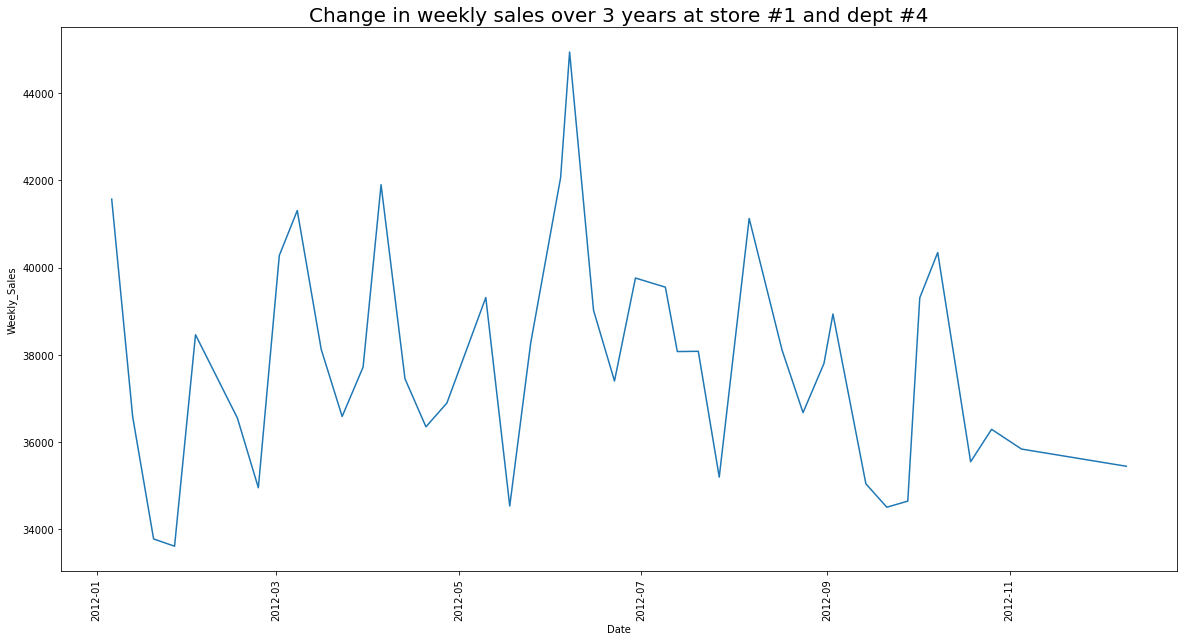

In [102]:
plt.subplots(figsize = (20,10))
plt.xticks(rotation = 90)
sns.lineplot(data = merged[(merged['Dept']==4)  & (merged['Store']==1) & (pd.to_datetime(merged['Date']).dt.year==2012)], x = 'Date',y = 'Weekly_Sales', ci = 1)
plt.title('Change in weekly sales over 3 years at store #1 and dept #4', fontsize=20)
plt.show()

In [104]:
import statsmodels.api as sm

y=merged['Weekly_Sales']
x=merged[['Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     327.5
Date:                Thu, 21 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:07:06   Log-Likelihood:            -4.8255e+06
No. Observations:              421570   AIC:                         9.651e+06
Df Residuals:                  421561   BIC:                         9.651e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          2.2e+04    340.735     64.572      

In [107]:
import statsmodels.api as sm

y=merged['Weekly_Sales']
x=merged[['Temperature']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.254
Date:                Thu, 21 Apr 2022   Prob (F-statistic):              0.133
Time:                        22:09:16   Log-Likelihood:            -4.8268e+06
No. Observations:              421570   AIC:                         9.654e+06
Df Residuals:                  421568   BIC:                         9.654e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.615e+04    119.184    135.524      

In [108]:
import statsmodels.api as sm

y=merged['Weekly_Sales']
x=merged[['MarkDown1']]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     940.2
Date:                Thu, 21 Apr 2022   Prob (F-statistic):          3.06e-206
Time:                        22:09:50   Log-Likelihood:            -4.8263e+06
No. Observations:              421570   AIC:                         9.653e+06
Df Residuals:                  421568   BIC:                         9.653e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.552e+04     38.005    408.442      0.0

In [113]:
merged[merged['IsHoliday_y']==False]['Weekly_Sales'].describe()

count    391909.000000
mean      15901.445069
std       22330.747450
min       -4988.940000
25%        2079.750000
50%        7589.950000
75%       20131.210000
max      406988.630000
Name: Weekly_Sales, dtype: float64

In [114]:
merged[merged['IsHoliday_y']==True]['Weekly_Sales'].describe()

count     29661.000000
mean      17035.823187
std       27222.000409
min        -798.000000
25%        2078.540000
50%        7947.740000
75%       21189.250000
max      693099.360000
Name: Weekly_Sales, dtype: float64

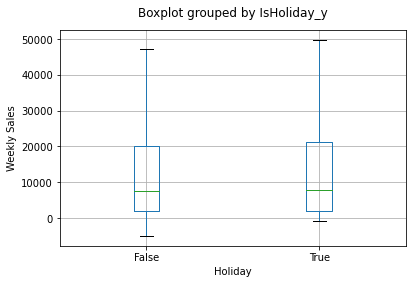

In [126]:
boxplot=merged[['Weekly_Sales','IsHoliday_y']].boxplot(by='IsHoliday_y', showfliers=False)
plt.xlabel("Holiday")
plt.ylabel("Weekly Sales")
plt.title("")
plt.show()

In [116]:
merged

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,year_m,sum_sales
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
1,1,2,2010-05-02,50605.27,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
2,1,3,2010-05-02,13740.12,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
3,1,4,2010-05-02,39954.04,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
4,1,5,2010-05-02,32229.38,False,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,A,151315,2010/05,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,2012/10,NaN
